# IMPORT LIBRARY

In [ ]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# UPLOAD DATASET

In [ ]:
# 2. Upload dataset (jika di Colab, jalankan sel ini untuk manual upload)
from google.colab import files
uploaded = files.upload()

Saving ResearchInformation3.csv to ResearchInformation3.csv


In [ ]:
# 3. Membaca dataset
df = pd.read_csv("ResearchInformation3.csv")

# 4. Menampilkan 5 baris pertama
df.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# --- Encoding untuk kolom kategorikal ---
categorical_cols = ['Department', 'Gender', 'Income', 'Hometown', 'Attendance']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Simpan encoder supaya bisa dipakai saat deploy
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
from google.colab import files
files.download('label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    int64  
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    int64  
 5   Hometown     493 non-null    int64  
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    int64  
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(6), object(6)
memory usage: 61.8+ KB


In [ ]:
# 1. Melihat ringkasan statistik dasar
df.describe()

,Gender,HSC,SSC,Income,Hometown,Computer,Attendance,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,0.665314,4.156775,4.767647,4.184584,0.567951,3.338742,1.306288,3.569980,3.163888,3.188383
std,0.472360,0.546504,0.349538,2.781400,0.495864,1.252988,0.730784,0.870515,0.641475,0.591801
min,0.000000,2.170000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,3.830000,4.680000,1.000000,0.000000,3.000000,1.000000,3.000000,2.810000,2.880000
50%,1.000000,4.170000,4.940000,5.000000,1.000000,3.000000,1.000000,4.000000,3.250000,3.270000
75%,1.000000,4.500000,5.000000,5.000000,1.000000,4.000000,2.000000,4.000000,3.670000,3.680000
max,1.000000,5.000000,5.000000,9.000000,1.000000,5.000000,3.000000,5.000000,4.000000,4.000000


In [ ]:
# 2. Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64


# EDA

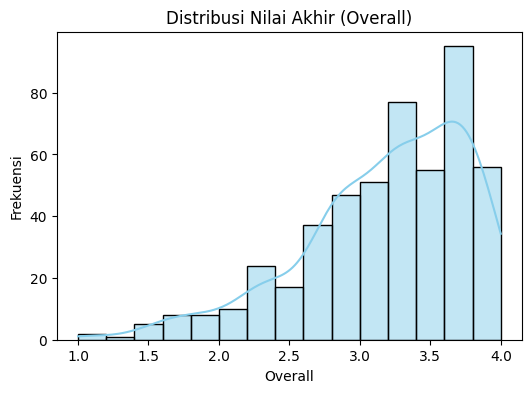

In [ ]:
# 3. Melihat distribusi nilai akhir (Overall)
plt.figure(figsize=(6,4))
sns.histplot(df['Overall'], kde=True, color='skyblue')
plt.title('Distribusi Nilai Akhir (Overall)')
plt.xlabel('Overall')
plt.ylabel('Frekuensi')
plt.show()

/tmp/ipython-input-491675515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


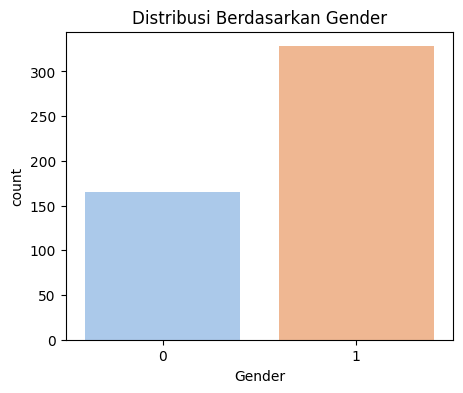

In [ ]:
# 4. Distribusi gender
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribusi Berdasarkan Gender')
plt.show()

/tmp/ipython-input-1838785562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income', y='Overall', data=df, palette='Set2')


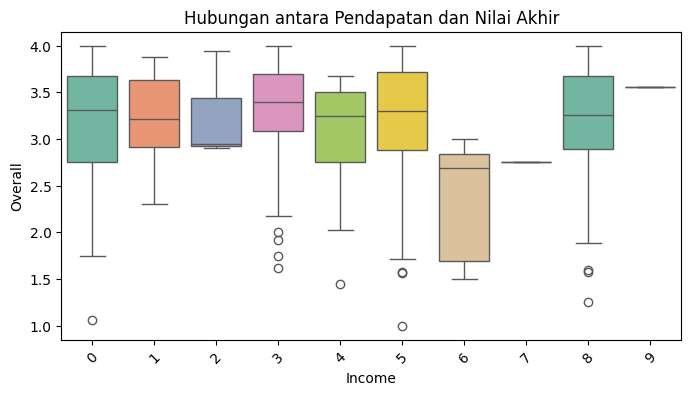

In [ ]:
# 5. Hubungan antara pendapatan keluarga dan nilai akhir
plt.figure(figsize=(8,4))
sns.boxplot(x='Income', y='Overall', data=df, palette='Set2')
plt.title('Hubungan antara Pendapatan dan Nilai Akhir')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3267781342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance', y='Overall', data=df, palette='Set3')


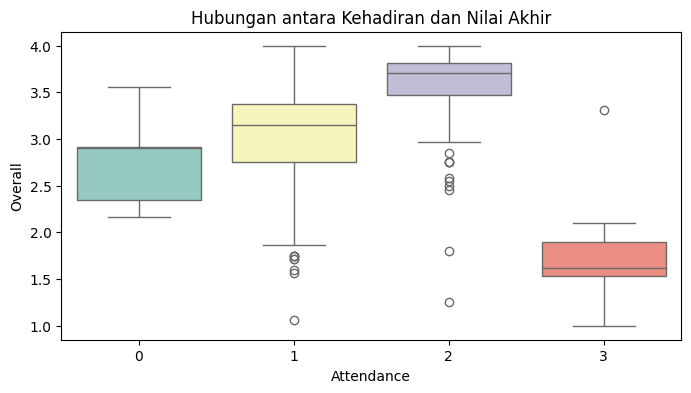

In [ ]:
# 6. Hubungan antara kehadiran dan prestasi
plt.figure(figsize=(8,4))
sns.boxplot(x='Attendance', y='Overall', data=df, palette='Set3')
plt.title('Hubungan antara Kehadiran dan Nilai Akhir')
plt.show()

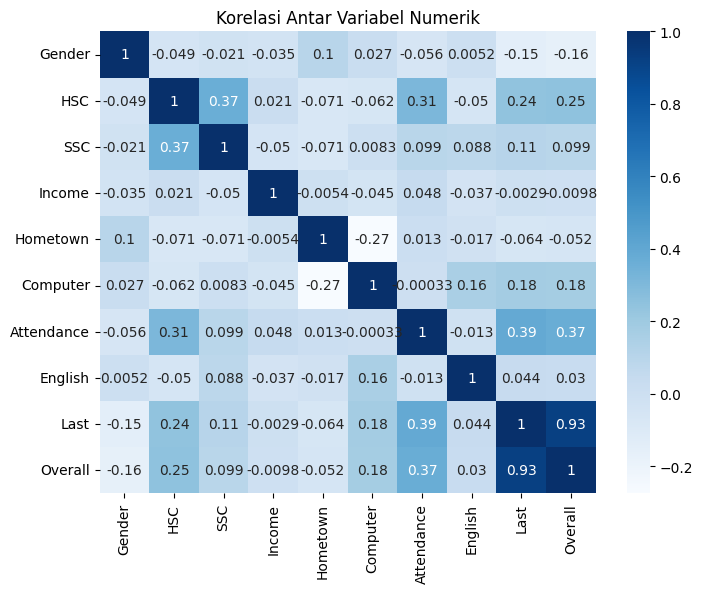

In [ ]:
# 7. Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap='Blues')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

/tmp/ipython-input-634567278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Computer', y='Overall', data=df, palette='coolwarm')


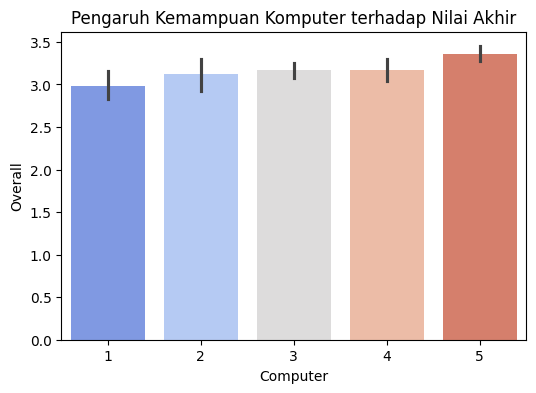

In [ ]:
# 8. Pengaruh kemampuan komputer terhadap nilai akhir
plt.figure(figsize=(6,4))
sns.barplot(x='Computer', y='Overall', data=df, palette='coolwarm')
plt.title('Pengaruh Kemampuan Komputer terhadap Nilai Akhir')
plt.show()

# MENYALIN DATAFRAME (buat jaga-jaga)

In [ ]:
# Menyalin dataframe untuk keamanan
data = df.copy()

# Melihat kolom kategorikal
categorical_cols = data.select_dtypes(include='object').columns
print("Kolom kategorikal:", categorical_cols.tolist())

# Encode semua kolom kategorikal dengan LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Melihat hasil encoding
data.head()

Kolom kategorikal: ['Department', 'Preparation', 'Gaming', 'Job', 'Extra', 'Semester']


,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,0,1,4.17,4.84,3,1,3,2,0,2,0,3,1,7,3.220,3.350
1,0,0,4.92,5.00,8,0,3,0,0,2,0,3,1,8,3.467,3.467
2,0,1,5.00,4.83,5,1,3,0,2,2,0,4,1,4,4.000,3.720
3,0,1,4.00,4.50,0,0,5,2,2,2,0,5,1,5,3.800,3.750
4,0,0,2.19,3.17,5,1,3,0,1,2,0,3,1,5,3.940,3.940


# SPLIT DATA

In [ ]:
# Fitur (X) dan target (y)
X = data.drop(columns=['Overall'])
y = data['Overall']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EVALUASI MODEL

In [ ]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi performa kedua model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} ===")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



=== Linear Regression ===
MAE  : 0.1500
RMSE : 0.2064
R²   : 0.8859

=== Random Forest ===
MAE  : 0.1231
RMSE : 0.1925
R²   : 0.9007


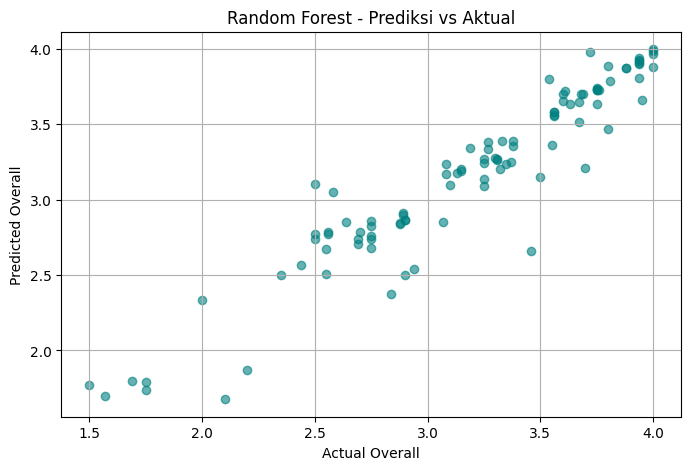

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.title("Random Forest - Prediksi vs Aktual")
plt.grid(True)
plt.show()


# MENYIMPAN MODEL DAN SCALER

In [ ]:
import joblib

# Simpan model dan scaler
joblib.dump(rf, 'model_random_forest.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model dan Scaler berhasil disimpan!")


Model dan Scaler berhasil disimpan!


In [ ]:
from google.colab import files

files.download('model_random_forest.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X.columns)

Index(['Department', 'Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer',
       'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra',
       'Semester', 'Last'],
      dtype='object')
